Proyek Pertama : Predictive Analytics - Muhammad Abiya Makruf

# Data Understanding

Import Library

In [186]:
#Import library yang digunakan untuk keseluruhan proyek
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

## Data Loading

In [187]:
#Download dataset dari repository github
!wget -O apartments_for_rent_classified_10K.xlsx https://raw.githubusercontent.com/AbiyaMakruf/Dicoding-PredictiveAnalytics/main/apartments_for_rent_classified_10K.xlsx

#Menampilkan isi dataset
df = pd.read_excel("/content/apartments_for_rent_classified_10K.xlsx")
df

--2024-07-19 15:00:32--  https://raw.githubusercontent.com/AbiyaMakruf/Dicoding-PredictiveAnalytics/main/apartments_for_rent_classified_10K.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2255679 (2.2M) [application/octet-stream]
Saving to: ‘apartments_for_rent_classified_10K.xlsx’

apartments_for_rent 100%[===================>]   2.15M  --.-KB/s    in 0.05s   

2024-07-19 15:00:32 (40.9 MB/s) - ‘apartments_for_rent_classified_10K.xlsx’ saved [2255679/2255679]



,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


Output kode di atas memberikan informasi :


*   Terdapat 10.000 baris
*   Terdapat 22 kolom



## Deskripsi Variabel
Berdasarkan informasi dari sumber dataset berikut adalah penjelasan untuk masing-masing kolom :

* id = unique identifier of apartment
* category = category of classified
* title = title text of apartment
* body = body text of apartment
* amenities = like AC, basketball,cable, gym, internet access, pool, refrigerator etc.
* bathrooms = number of bathrooms
* bedrooms = number of bedrooms
* currency = price in current
* fee = fee
* has_photo = photo of apartment
* pets_allowed = what pets are allowed dogs/cats etc.
* price = rental price of apartment
* price_display = price converted into display for reader
* price_type = price in USD
* square_feet = size of the apartment
* address =  where the apartment is located
* cityname =  where the apartment is located
* state =  where the apartment is located
* latitude = where the apartment is located
* longitude = where the apartment is located
* source = origin of classified
* time = when classified was created

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

Output kode di atas memberikan informasi :


*   Terdapat 4 kolom bertipe data float64, 4 kolom bertipe data int64, dan 14 kolom bertipe data object
*   Dengan jumlah data 10.000 terdapat beberapa kolom yang memiliki value Null
*   Kolom price merupakan target



In [189]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


Output kode di atas memberikan informasi :

* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

## Menangani Missing Value dan Outliers

In [190]:
# Melakukan cek terhadap kolom mana saja yang memiliki value Null
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Membuat DataFrame untuk menampilkan kolom yang memiliki nilai null beserta tipe datanya
nan_info = pd.DataFrame({
    'Tipe Data': df[columns_with_nan].dtypes,
    'Jumlah Null': df[columns_with_nan].isnull().sum()
})

print("Kolom yang memiliki nilai Null beserta tipe datanya:")
print(nan_info)

Kolom yang memiliki nilai Null beserta tipe datanya:
             Tipe Data  Jumlah Null
amenities       object         3549
bathrooms      float64           34
bedrooms       float64            7
pets_allowed    object         4163
address         object         3327
cityname        object           77
state           object           77
latitude       float64           10
longitude      float64           10


Output kode di atas memberikan informasi :


*   Terdapat kolom numeric yang memiliki Null Value
*   Terdapat kolom object yang memiliki Null Value
*   Kolom Amenities, pets_allowed, dan address memiliki jumlah missing value yang besar



Cara Mengatasi Missing Values
1.   Drop Missing Values
2.   Imputasi (Pengisian Missing Values)

Kolom dengan jumlah Null kurang dari 100 akan dilakukan drop.

Kolom dengan jumlah Null lebih dari 100 akan dilakukan imputasi.

In [191]:
#Mengcopy dataset agar dataset original tidak terpengaruhi
df_cleaned = df.copy()

# Melakukan drop terhadap kolom yang memiliki jumlah Null kurang dari 100 karena tidak terlalu berpengaruh terhadap jumlah data
df_cleaned = df_cleaned.dropna(subset=['bathrooms', 'bedrooms','cityname','state','latitude','longitude'])

Kolom yang memiliki jumlah Null lebih dari 100 adalah amenities, pets_allowed dan address.

Kolom-kolom tersebut merupakan kolom bertipe data objek maka akan dilakukan imputasi terhadap kolom-kolom tersebut dengan nilai "not provided".

Nilai "not provided" dipilih karena belum tentu bahwa tidak memiliki amenities, tidak memperbolehkan hewan, dan tidak memiliki alamat.

In [192]:
# Imputasi untuk kolom kategori
df_cleaned['amenities'].fillna('not provided', inplace=True)
df_cleaned['pets_allowed'].fillna('not provided', inplace=True)
df_cleaned['address'].fillna('not provided', inplace=True)

In [193]:
# Melakukan cek terhadap kolom mana saja yang memiliki value Null
columns_with_nan = df_cleaned.columns[df_cleaned.isnull().any()].tolist()

# Membuat DataFrame untuk menampilkan kolom yang memiliki nilai null beserta tipe datanya
nan_info = pd.DataFrame({
    'Tipe Data': df_cleaned[columns_with_nan].dtypes,
    'Jumlah Null': df_cleaned[columns_with_nan].isnull().sum()
})

print("Kolom yang memiliki nilai Null beserta tipe datanya:")
print(nan_info)
print("Jumlah akhir dataset: ",df_cleaned.shape)

Kolom yang memiliki nilai Null beserta tipe datanya:
Empty DataFrame
Columns: [Tipe Data, Jumlah Null]
Index: []
Jumlah akhir dataset:  (9883, 22)


In [194]:
# Menampilkan semua kolom yang bertipe data numerik
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()
print("Kolom yang bertipe data numerik:")
print(numeric_columns)


Kolom yang bertipe data numerik:
['id', 'bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude', 'time']


Output kode di atas memberikan informasi :
* Terdapat 8 kolom yang bertipe data numerik
* Kolom id, latitude, longtitude, dan time tidak akan dilakukan pengecekan outlier

Kolom 'id', 'latitude', 'longitude', dan 'time' memiliki karakteristik dan kegunaan yang berbeda dari kolom numerik yang biasanya dianalisis untuk outliers. Oleh karena itu, pengecekan outliers pada kolom-kolom ini tidak  diperlukan.

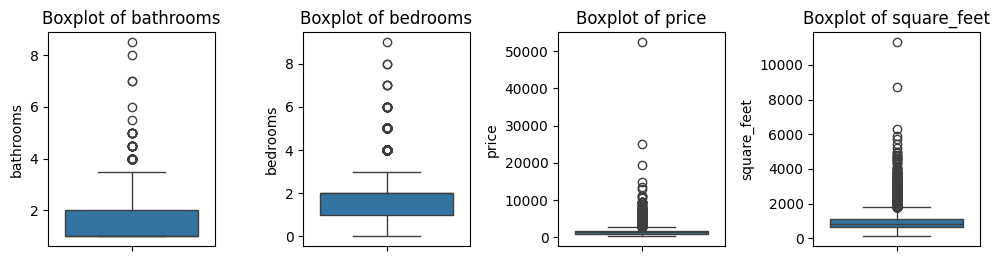

In [195]:
#Kolom numerik yang akan diperiksa outliers nya
numeric_columns = ['bathrooms', 'bedrooms', 'price','square_feet']

# Menampilkan boxplot untuk masing-masing kolom
plt.figure(figsize=(10, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Output kode di atas memberikan informasi :
* Beberapa fitur numerik yang dianalisis memiliki outliers

Mengatasi outlier menggunakan metode IQR

In [196]:
#Fungsi untuk menghapus outlier
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Daftar kolom yang akan diatasi outliersnya
numeric_columns = ['bathrooms', 'bedrooms', 'price','square_feet']

#Menghapus outliers dari masing-masing kolom
for column in numeric_columns:
    df_cleaned = remove_outliers_iqr(df_cleaned, column)

# Verifikasi hasil
df_cleaned.shape

(8494, 22)

Output kode di atas memberikan informasi :
* Dataset sudah bersih
* Total sampel menjadi 8494

## Univariate Analysis

In [197]:
#Membagi fitur pada dataset menjadi dua bagian
#Fitur yang tidak relevan seperti id, latitude, longtitude, dan time tidak dianalisis
#Fitur memiliki unique value terlalu banyak seperti title, body, amenities, dan address tidak dianalisis
#Fitur yang memiliki value mirip seperti price_display dengan price tidak diambil
#Fitur currency dan fee tidak dianalisis karena memiliki value yang sama untuk keseluruhan dataset

categorical_features = ['category', 'has_photo', 'pets_allowed', 'price_type','cityname', 'state', 'source']
numerical_features = ['bathrooms', 'bedrooms', 'price', 'square_feet']

Melakukan analisis terhadap fitur kategori terlebih dahulu.

In [198]:
#Fungsi untuk menghitung jumlah sampel
#Fungsi untuk menampilkan plot

def analyze_and_plot_category(df, categorical_feature):
    """
    Menganalisis dan menampilkan plot untuk fitur kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang mengandung data.
    categorical_feature (str): Nama fitur kategorikal untuk dianalisis.
    """
    # Menganalisis jumlah sampel dan persentase
    count = df[categorical_feature].value_counts()
    percent = 100 * df[categorical_feature].value_counts(normalize=True)
    df_analysis = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(df_analysis)

    # Menampilkan plot
    plt.figure(figsize=(3, 2))
    count.plot(kind='bar', title=categorical_feature)
    plt.xlabel(categorical_feature)
    plt.ylabel('Jumlah')
    plt.show()

                         jumlah sampel  persentase
category                                          
housing/rent/apartment            8491       100.0
housing/rent/home                    2         0.0
housing/rent/short_term              1         0.0


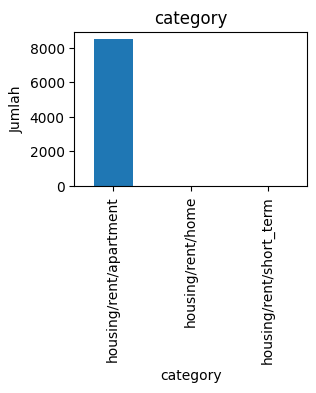

In [199]:
#Analisis fitur category
analyze_and_plot_category(df_cleaned, 'category')

Output kode di atas memberikan informasi :
* Terdapat 3 kategori yaitu housing/rent/apartement, housing/rent/home, housinig/rent/short_term
* Jumlah kategori housing/rent/home dan housing/rent/short_term sangat sedikit yaitu berjumlah 2 dan 1
* Dapat dilakukan drop terhadap baris yang memiliki value sangat sedikit

           jumlah sampel  persentase
has_photo                           
Thumbnail           7489        88.2
Yes                  845         9.9
No                   160         1.9


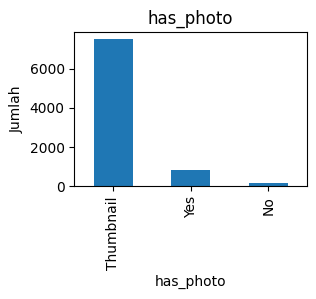

In [200]:
#Analisis fitur has_photo
analyze_and_plot_category(df_cleaned, 'has_photo')

Output kode di atas memberikan informasi :
* Terdapat 3 kategori yaitu thumbnail, yes, dan no
* Kategori terbanyak adalah thumbnail

              jumlah sampel  persentase
pets_allowed                           
Cats,Dogs              4440        52.3
not provided           3561        41.9
Cats                    438         5.2
Dogs                     55         0.6


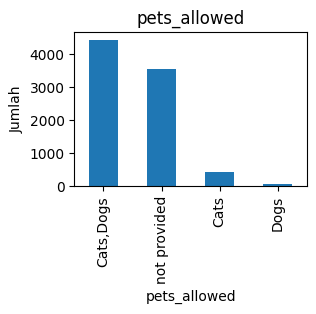

In [201]:
#Analisis fitur pets_allowed
analyze_and_plot_category(df_cleaned, 'pets_allowed')

Output kode di atas memberikan informasi :
* Terdapat 4 kategori yaitu cats/dogs, not provided, cats, dan dogs
* Kategori terbanyak yaitu cats/dogs
* Kategori terbanyak kedua yaitu not provided

            jumlah sampel  persentase
price_type                           
Monthly              8493       100.0
Weekly                  1         0.0


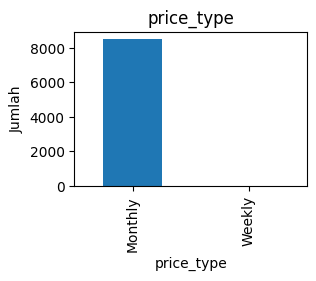

In [202]:
#Analisis fitur price_type
analyze_and_plot_category(df_cleaned, 'price_type')

Output kode di atas memberikan informasi :
* Terdapat dua kategori yaitu monthly dan weekly
* Kategori weekly memiliki jumlah yang sangat sedikit sehingga dapat dilakukan drop

              jumlah sampel  persentase
cityname                               
Austin                  518         6.1
Dallas                  205         2.4
Houston                 177         2.1
San Antonio             172         2.0
Chicago                 128         1.5
...                     ...         ...
New Brighton              1         0.0
Mililani                  1         0.0
Rexburg                   1         0.0
Port Richey               1         0.0
Taylor                    1         0.0

[1401 rows x 2 columns]


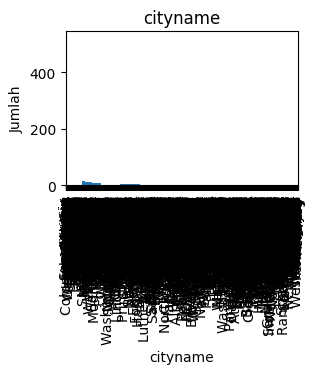

In [203]:
#Analisis fitur cityname
analyze_and_plot_category(df_cleaned, 'cityname')

In [204]:
#Hitung frekuensi kemunculan setiap cityname
cityname_counts = df['cityname'].value_counts()

#Filter cityname yang muncul hanya sekali
cityname_single_occurrence = cityname_counts[cityname_counts == 1]

#Tampilkan jumlah cityname yang muncul hanya sekali
print(f"Ada {cityname_single_occurrence.shape[0]} cityname yang muncul hanya sekali.")


Ada 682 cityname yang muncul hanya sekali.


Output kode di atas memberikan informasi :
* Terdapat 1401 kota berbeda
* Kota dengan jumlah sampel terbanyak adalah austin
* Terdapat 682 kota yang hanya muncul satu kali

       jumlah sampel  persentase
state                           
TX              1618        19.0
CA               575         6.8
WA               461         5.4
MD               406         4.8
NC               369         4.3
NJ               325         3.8
GA               321         3.8
CO               295         3.5
OH               284         3.3
WI               274         3.2
FL               273         3.2
IL               242         2.8
MO               220         2.6
MN               212         2.5
IN               200         2.4
VA               180         2.1
PA               171         2.0
IA               169         2.0
OR               164         1.9
OK               154         1.8
MI               148         1.7
MA               121         1.4
AZ               106         1.2
NV               104         1.2
ND               102         1.2
NE                99         1.2
CT                96         1.1
TN                79         0.9
KS        

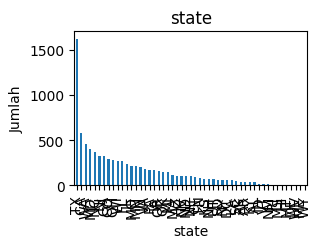

In [205]:
#Analisis fitur state
analyze_and_plot_category(df_cleaned, 'state')

In [206]:
#Menghitung jumlah negara bagian (state) yang berbeda
num_unique_states = df['state'].nunique()
print(f"Terdapat {num_unique_states} negara bagian yang berbeda.")

Terdapat 51 negara bagian yang berbeda.


Output kode di atas memberikan informasi :
* Terdapat 51 state berbeda
* State dengan jumlah sampel terbanyak adalah TX

                   jumlah sampel  persentase
source                                      
RentLingo                   5641        66.4
RentDigs.com                2565        30.2
ListedBuy                    161         1.9
RealRentals                   65         0.8
GoSection8                    29         0.3
Listanza                      14         0.2
RENTOCULAR                    13         0.2
rentbits                       2         0.0
Home Rentals                   1         0.0
Real Estate Agent              1         0.0
False                          1         0.0
tenantcloud                    1         0.0


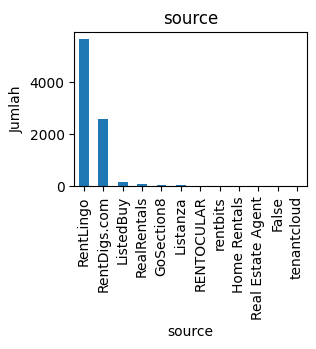

In [207]:
#Analisis fitur source
analyze_and_plot_category(df_cleaned, 'source')

Output kode di atas memberikan informasi :
* Terdapat 12 kategori berbeda
* Terdapat kategori "False" dengan jumlah 1
* Dapat dilakukan drop terhadap kategori "False"

Melakukan analisis terhadap fitur numerik.

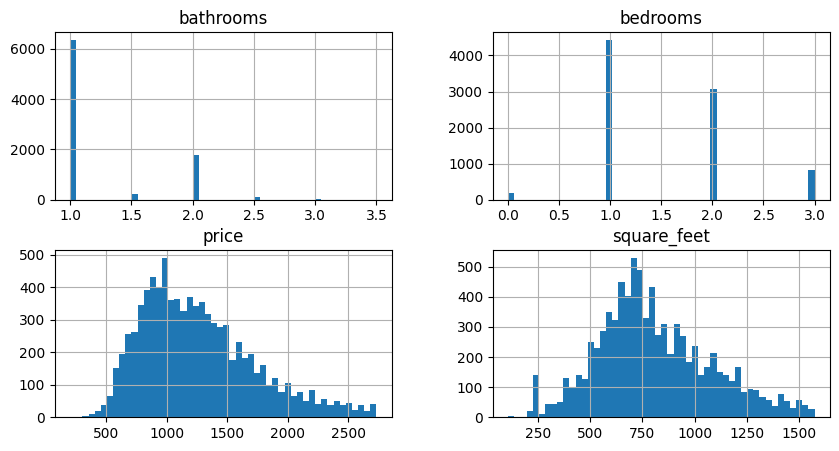

In [208]:
#Menampilkan histogram untuk fitur numerik
df_cleaned[numerical_features].hist(bins=50,figsize=(10,5))
plt.show()

Output kode di atas memberikan informasi :

1. Bathrooms
 * Mayoritas memiliki 1 kamar mandi. Terdapat rumah yang memiliki 1.5 dan 2.5 kamar mandi
 * Kamar mandi seharusnya tidak berbentuk float sehingga akan dilakukan drop
2. Bedrooms
 * Mayoritas memiliki 1 atau 2 kamar tidur.
3. Price
 * Harga sewa apartemen tersebar dengan puncak sekitar 700-1000 USD. Distribusi harga menunjukkan pola normal dengan sedikit skew ke kanan.
4. Square_feet
 * Luas apartemen bervariasi dengan puncak sekitar 500-800 kaki persegi. Distribusi luas juga menunjukkan pola normal dengan skew ke kanan.

Berdasarkan analisis univariate ditemukan beberapa sampel yang akan dilakukan drop.

In [209]:
df_cleaned.shape

(8494, 22)

In [210]:
#Menghapus data yang value pada kolom category bernilai "housing/rent/home" dan "housing/rent/short_term"
df_cleaned = df_cleaned[~df_cleaned['category'].isin(['housing/rent/home', 'housing/rent/short_term'])]

#Menghapus data yang value pada kolom price_type bernilai "weekly"
df_cleaned = df_cleaned[df_cleaned['price_type'] != 'Weekly']

#Menghapus data yang value pada kolom source bernilai "False"
df_cleaned = df_cleaned[df_cleaned['source'] != 'FALSE']

#Menghapus data yang memiliki nilai non-bulat pada kolom bathrooms
df_cleaned = df_cleaned[df_cleaned['bathrooms'] % 1 == 0]

In [211]:
df_cleaned.shape

(8136, 22)

Output kode di atas memberikan informasi :
* Setelah dilakukan cleaning lebih lanjut total data yang dimiliki menjadi 8136

In [212]:
#Menampilkan kolom yang hanya memiliki satu nilai unik
single_value_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]

print("Kolom yang hanya memiliki satu nilai unik untuk keseluruhan dataset:")
print(single_value_columns)


Kolom yang hanya memiliki satu nilai unik untuk keseluruhan dataset:
['category', 'currency', 'fee', 'price_type']


## Multivariate Analysis

Categorical Features.

<ipython-input-213-802eaad78550>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_cleaned, palette="Set3")


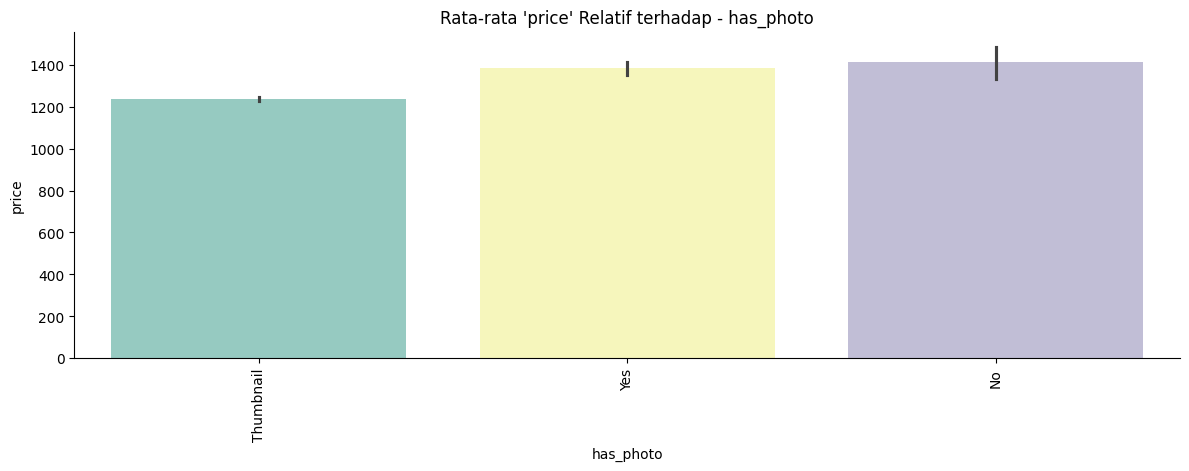

<ipython-input-213-802eaad78550>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_cleaned, palette="Set3")


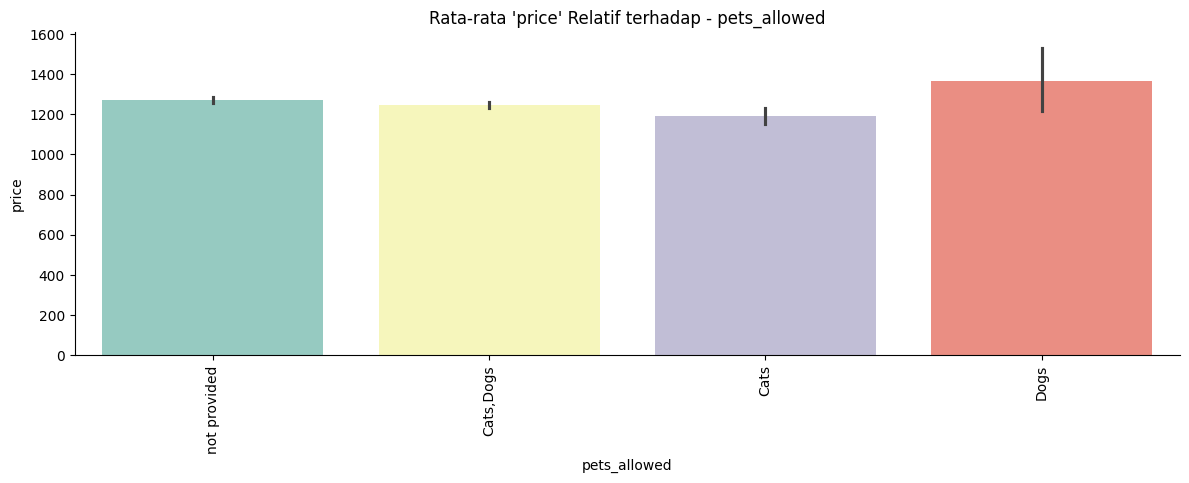

<ipython-input-213-802eaad78550>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_cleaned, palette="Set3")


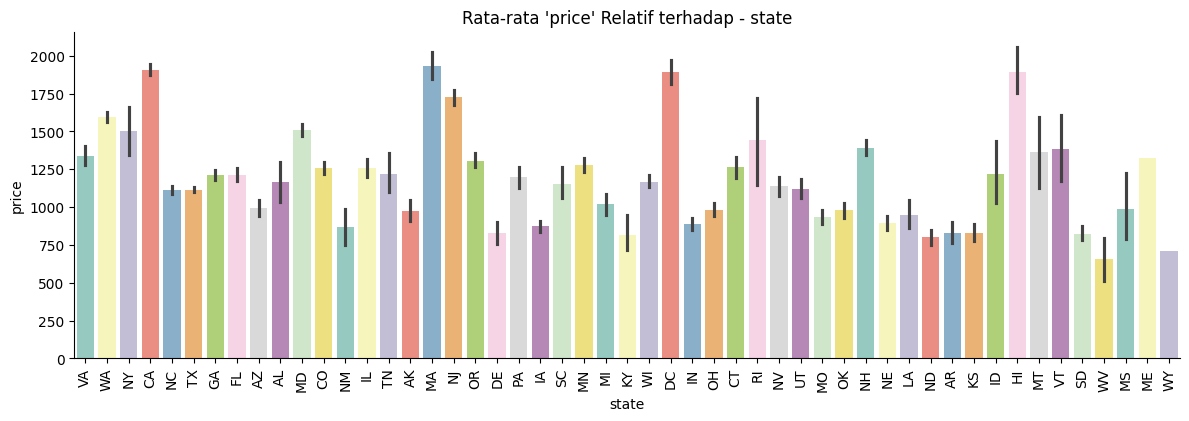

<ipython-input-213-802eaad78550>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_cleaned, palette="Set3")


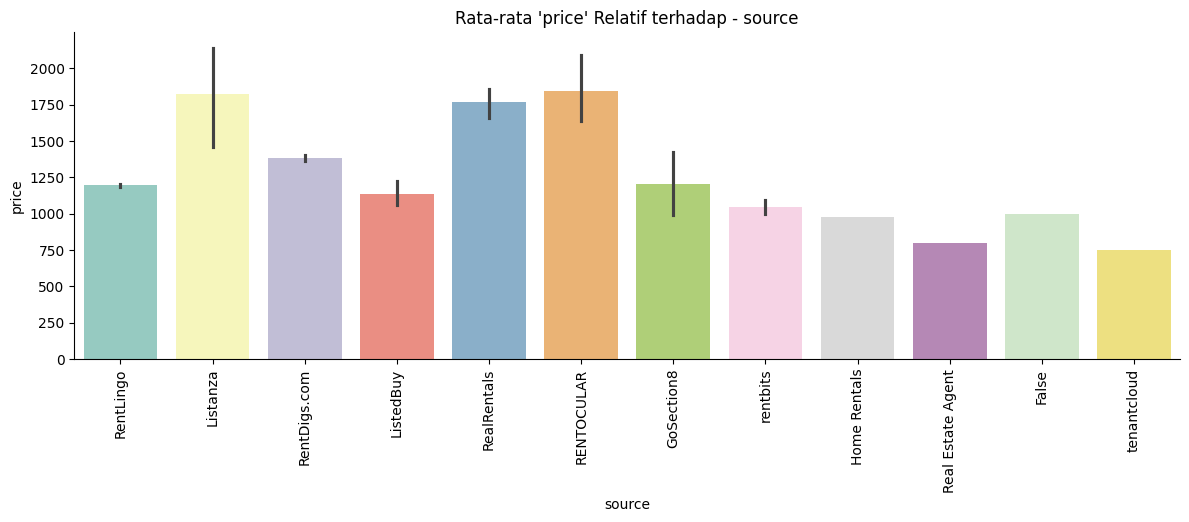

In [213]:
#Daftar fitur kategorikal dalam dataset
#Fitur yang tidak memiliki pengaruh dan jumlah unik value yang terlalu besar tidak dianalisis
categorical_features = ['has_photo','pets_allowed','state','source']

#Membuat plot untuk setiap fitur kategorikal
for col in categorical_features:
    sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_cleaned, palette="Set3")
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))
    plt.xticks(rotation=90)
    plt.show()

Output kode di atas memberikan informasi :
* Semua fitur hampir memberikan pengaruh yang cenderung mirip terhadap harga

Numerical Features.

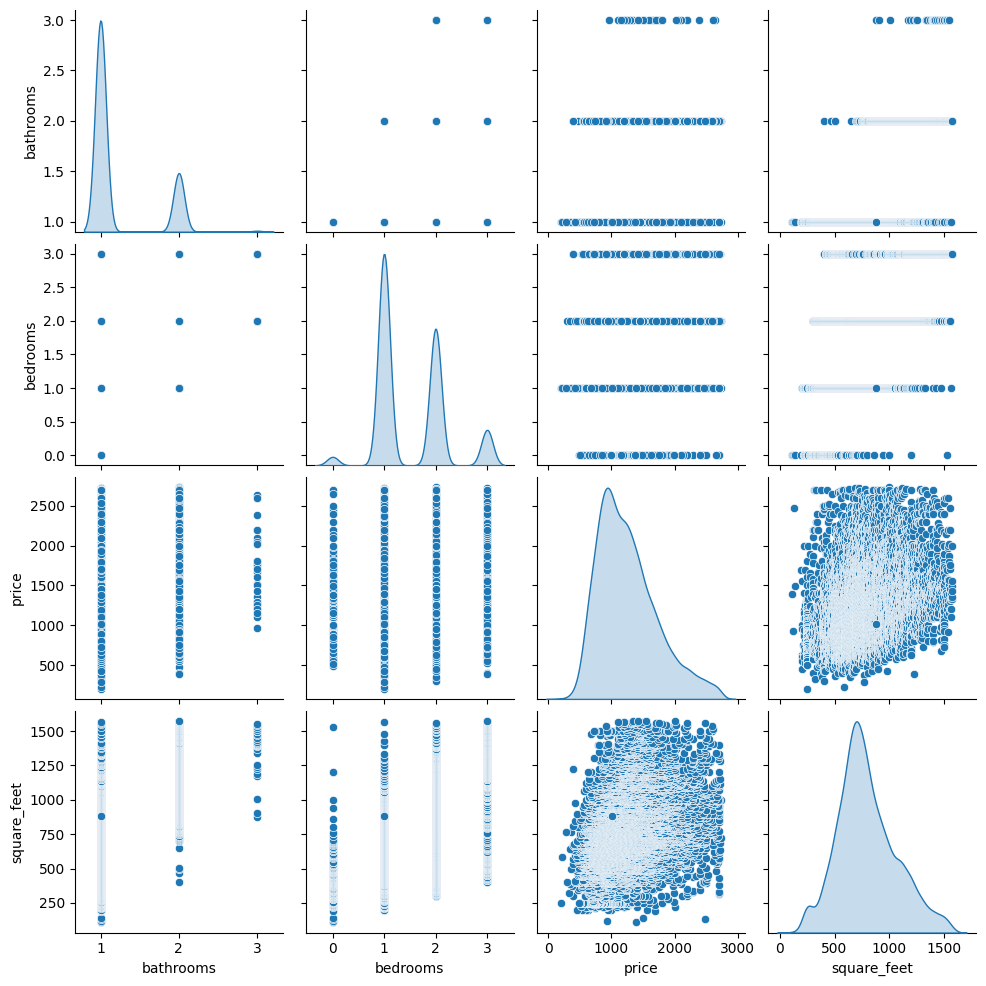

In [214]:
#Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
numerical_features = ['bathrooms','bedrooms','price','square_feet']
sns.pairplot(df_cleaned[numerical_features], diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

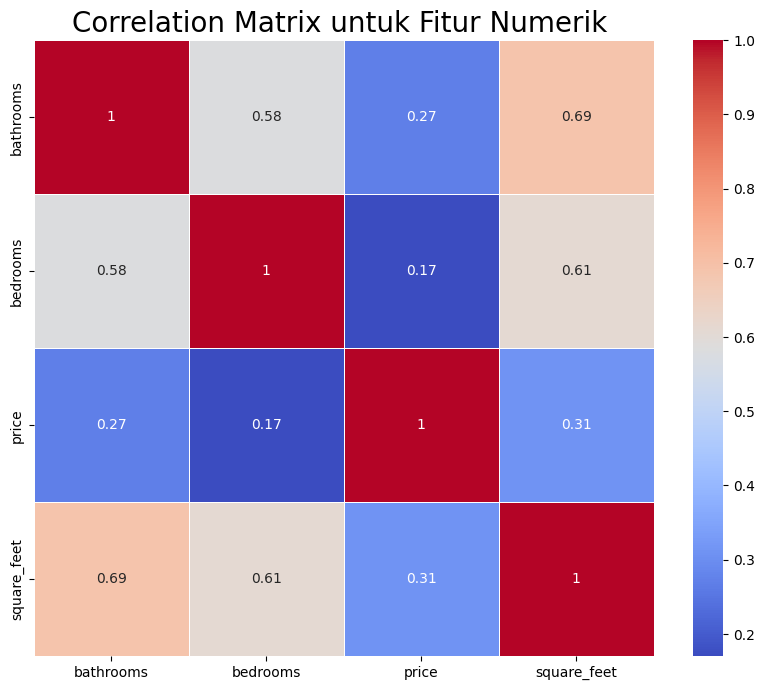

In [215]:
#Menampilkan heatmap untuk korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Output kode di atas memberikan informasi :
1. Hubungan antara Luas Bangunan dan Fitur Lain:
 * Fitur square_feet (luas bangunan) memiliki hubungan yang cukup kuat dengan bathrooms dan bedrooms, yang menunjukkan bahwa luas bangunan adalah indikator penting dari ukuran dan fasilitas apartemen.
2. Harga Sewa:
 * Korelasi antara harga sewa (price) dengan fitur lain (kamar mandi dan kamar tidur) relatif rendah. Ini menunjukkan bahwa harga sewa mungkin dipengaruhi oleh faktor-faktor lain seperti lokasi, fasilitas tambahan, atau kondisi pasar yang tidak tercakup dalam fitur yang dianalisis.

# Data Preparation

Pada bagian ini kita akan melakukan empat tahap persiapan data, yaitu:

* Drop fitur yang tidak memberikan nilai tambahan.
* Encoding fitur kategori.
* Pembagian dataset dengan fungsi train_test_split dari library sklearn.
* Standarisasi.

Fitur-fitur ini di-drop karena tidak memberikan nilai tambah untuk analisis atau model prediksi:


1. id (Tidak memberikan nilai tambah)
2. category (Nilainya sama untuk keseluruhan dataset)
3. title (Tidak memberikan nilai tambah)
4. body (Tidak memberikan nilai tambah)
5. currency (Nilainya sama untuk keseluruhan dataset)
6. fee (Nilainya sama untuk keseluruhan dataset)
7. price_display (Memiliki nilai yang sama dengan fitur `price`)
8. price_type (Nilainya sama untuk keseluruhan dataset)
9. address (Tidak memberikan nilai tambah)
10. latitude (Tidak memberikan nilai tambah)
11. longitude (Tidak memberikan nilai tambah)
12. time (Tidak memberikan nilai tambah)




In [216]:
#Melakukan drop kolom
features_to_drop = ['id', 'category','title', 'body','currency', 'fee','price_display','price_type','address','latitude','longitude','time']
df_cleaned = df_cleaned.drop(columns=features_to_drop)

In [217]:
#Menampilkan dataset setelah dilakukan drop
df_cleaned.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,source
2,not provided,1.0,0.0,Thumbnail,not provided,1390,107,Arlington,VA,RentLingo
3,not provided,1.0,0.0,Thumbnail,not provided,925,116,Seattle,WA,RentLingo
5,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,Thumbnail,not provided,2475,130,Manhattan,NY,Listanza
8,Refrigerator,1.0,0.0,Thumbnail,not provided,1495,138,San Francisco,CA,RentLingo
14,Refrigerator,1.0,0.0,Thumbnail,not provided,1695,190,San Francisco,CA,RentLingo


Output kode di atas memberikan informasi :
* Jumlah fitur tersisa 10 dari 22

In [218]:
#Mengubah fitur kategorikal menjadi numerik
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['amenities'], prefix='amenities')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['has_photo'], prefix='has_photo')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['pets_allowed'], prefix='pets_allowed')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['cityname'], prefix='cityname')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['state'], prefix='state')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['source'], prefix='source')], axis=1)

#Menghapus kolom kategorikal asli
df_cleaned.drop(['amenities', 'has_photo', 'pets_allowed','cityname', 'state', 'source'], axis=1, inplace=True)

#Menampilkan DataFrame yang telah dibersihkan
df_cleaned.head()

,bathrooms,bedrooms,price,square_feet,amenities_AC,"amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Dishwasher,Fireplace,Gated,Gym,Parking,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Dishwasher,Internet Access,Patio/Deck,Washer Dryer","amenities_AC,Basketball,Cable or Satellite",...,source_Home Rentals,source_Listanza,source_ListedBuy,source_RENTOCULAR,source_Real Estate Agent,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud
2,1.0,0.0,1390,107,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,0.0,925,116,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,1.0,0.0,2475,130,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,1.0,0.0,1495,138,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14,1.0,0.0,1695,190,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Output kode di atas memberikan informasi :
* Telah berhasil dilakukan one-hot-encoding namun value masih berupa True dan False
* Harus dilakukan pengubahan value menjadi numerik

In [219]:
#Mengubah nilai True dan False menjadi 1 dan 0
df_cleaned = df_cleaned.astype(int)
df_cleaned.head(1)

,bathrooms,bedrooms,price,square_feet,amenities_AC,"amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Dishwasher,Fireplace,Gated,Gym,Parking,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Dishwasher,Internet Access,Patio/Deck,Washer Dryer","amenities_AC,Basketball,Cable or Satellite",...,source_Home Rentals,source_Listanza,source_ListedBuy,source_RENTOCULAR,source_Real Estate Agent,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud
2,1,0,1390,107,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Train-Test-Split

In [220]:
#Kolom yang menjadi target adalah kolom price
X = df_cleaned.drop(["price"],axis =1)
y = df_cleaned["price"]

#Pembagian data adalah 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [221]:
#Menampilkan jumlah sampel pada masing-masing bagian
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 8136
Total # of sample in train dataset: 6508
Total # of sample in test dataset: 1628


Standarisasi

In [225]:
#Melakukan standarisasi terhadap fitur numerik pada data train
numerical_features = ['bathrooms','bedrooms','square_feet']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bathrooms,bedrooms,square_feet
6132,1.823609,0.718495,0.454709
8642,1.823609,2.173823,2.079580
8716,1.823609,2.173823,2.218106
3978,-0.526034,-0.736832,-0.200480
5992,-0.526034,0.718495,0.402294


In [226]:
#Melakukan cek terhadap nilai mean dan std
X_train[numerical_features].describe().round(4)

,bathrooms,bedrooms,square_feet
count,6508.0000,6508.0000,6508.0000
mean,-0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001
min,-0.5260,-2.1922,-2.5667
25%,-0.5260,-0.7368,-0.6460
50%,-0.5260,-0.7368,-0.1593
75%,-0.5260,0.7185,0.5895
max,4.1733,2.1738,2.9295


# Modeling

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma.
1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm

In [227]:
#Menyiapkan dataframe untuk analisis masing-masing model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [228]:
#Melatih model KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [229]:
#Melatih model Random Forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [230]:
#Melatih model Boosting Algorithm
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluation

In [231]:
#Melakukan standarisasi terhadap fitur numerik pada data test
numerical_features = ['bathrooms','bedrooms','square_feet']
scaler = StandardScaler()
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,bathrooms,bedrooms,square_feet
934,-0.527491,-0.740548,-1.118005
7501,1.818837,0.699849,1.142952
2418,-0.527491,-0.740548,-0.582912
8146,-0.527491,0.699849,1.519779
6131,1.818837,-0.740548,0.442056


In [232]:
#Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

#Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

#Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

#Print mse
mse

,train,test
KNN,78.099856,97.804678
RF,59.18405,93.696278
Boosting,148.285221,156.19596


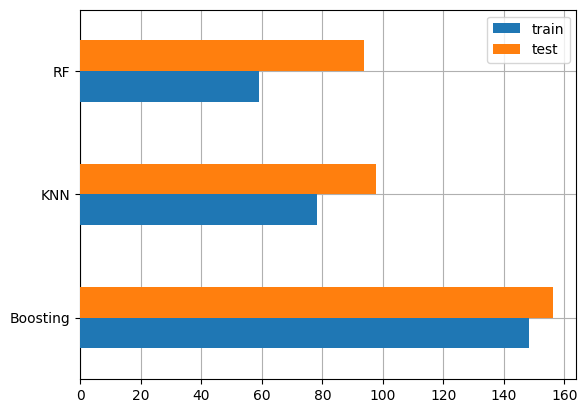

In [233]:
#Plot metrik dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Output kode di atas memberikan informasi :
* Model random forest memberikan nilai error yang paling kecil sedangkan model boosting memberikan nilai error yang paling besar.

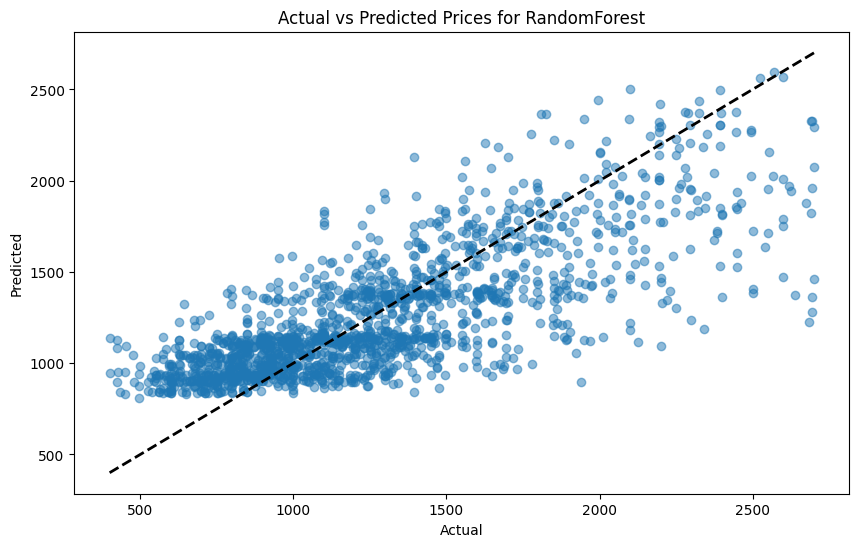

In [236]:
#Hitung MSE untuk data latih dan data uji
train_mse = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)
test_mse = mean_squared_error(y_pred=RF.predict(X_test), y_true=y_test)

# impan nilai MSE dalam DataFrame untuk visualisasi
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['RandomForest'])
models.loc['train_mse', 'RandomForest'] = train_mse
models.loc['test_mse', 'RandomForest'] = test_mse

#Buat prediksi pada data uji
y_pred = RF.predict(X_test)

#Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices for RandomForest')
plt.show()